In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_excel("Dataset.xlsx")

In [ ]:
data

,HOUSEAREA,RENT
0,800,8900
1,850,7500
2,900,9000
3,1000,9400
4,1200,12900
5,1300,12700
6,1400,14500
7,1500,15800
8,1650,17500
9,1800,18300


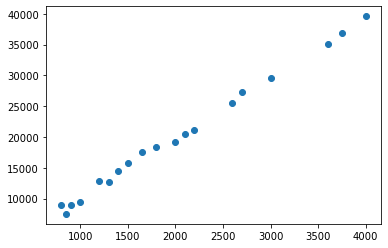

In [ ]:
plt.scatter(data['HOUSEAREA'], data['RENT'])

**VARIABLES**: $n, w, x_i, y_i, b$

**EQUATION**: $\hat{y_i} = wx_i + b$

**LOSS FUNCTION**: $J(w, b) = \frac{1}{2n} \sum (y_i - (wx_i + b))^2$

**ALGORITHM**

----
```
set alpha
set epoch
e starting from 1 to epoch, repeat:
    loss = calculate_loss()
    w = w + alpha * delta_w
    b = b + alpha * delta_b
```

**CHANGES**

$\delta w = \frac{\partial J}{\partial w} = \frac{1}{n} \sum (wx_i + b - y_i) * x_i$

$\delta b = \frac{\partial J}{\partial b} = \frac{1}{n} \sum (wx_i + b - y_i)$

In [ ]:
def part_der_J_b(n, w, X, b, Y):
    total_sum = 0
    for i in range(0, n):
        sum_of_an_iteration = (y_cap(w, X[i], b) - Y[i])
        total_sum = total_sum + sum_of_an_iteration
    return total_sum/n
    

In [ ]:
def part_der_J_w(n, w, X, b, Y):
    total_sum = 0
    for i in range(0, n):
        sum_of_an_iteration = (y_cap(w, X[i], b) - Y[i]) * X[i]
        total_sum = total_sum + sum_of_an_iteration
    return total_sum/n

In [ ]:
def y_cap(w, x, b):
    return w*x + b

In [ ]:
def calculate_loss(n, w, X, b, Y):
    total_sum = 0
    for i in range(0, n):
        sum_of_an_iteration = (y_cap(w, X[i], b) - Y[i])**2
        total_sum = total_sum + sum_of_an_iteration
    return total_sum/(2*n)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(data[['HOUSEAREA']])
Y = MinMaxScaler().fit_transform(data[['RENT']])

In [ ]:
#X = data['HOUSEAREA']
#Y = data['RENT']
Y

array([[0.04361371],
       [0.        ],
       [0.04672897],
       [0.05919003],
       [0.1682243 ],
       [0.16199377],
       [0.21806854],
       [0.25856698],
       [0.31152648],
       [0.3364486 ],
       [0.36448598],
       [0.42367601],
       [0.40498442],
       [0.56074766],
       [0.61682243],
       [0.68535826],
       [0.85981308],
       [0.91277259],
       [1.        ]])

In [ ]:
alpha = 1
epoch = 100
w = [0]
b = [0]

n = len(X)

array_of_losses = []
array_of_ws = []
array_of_bs = []

#print("X : {}, Y: {}". format(X, Y))
print("No of Data Points: {}".format(n))
print("------------")
print("Initial Parameters - W: {}, b = {}".format(w, b))
print("Hyper Parameters - alpha: {}, epochs: {}".format(alpha, epoch))

for epoch_num in range(0, epoch):
    loss = calculate_loss(n, w, X, b, Y)
    
    array_of_losses.append(loss[0])
    array_of_ws.append(w[0])
    array_of_bs.append(b[0])
    
    
    print("CURRENT LOSS: {}".format(float(loss)))
    
    print("W: {}, B: {}".format(w, b))
    
    w = w - alpha * part_der_J_w(n, w, X, b, Y)
    b = b - alpha * part_der_J_b(n, w, X, b, Y)
    
    
    
    

No of Data Points: 19
------------
Initial Parameters - W: [0], b = [0]
Hyper Parameters - alpha: 1, epochs: 100
CURRENT LOSS: 0.12105809695578508
W: [0], B: [0]
CURRENT LOSS: 0.025243423887482717
W: [0.24052867], B: [0.2996288]
CURRENT LOSS: 0.020728987316151512
W: [0.30936462], B: [0.27341906]
CURRENT LOSS: 0.01702767988580599
W: [0.37169376], B: [0.24968683]
CURRENT LOSS: 0.013993042788248738
W: [0.42813115], B: [0.22819792]
CURRENT LOSS: 0.011504997013296419
W: [0.47923371], B: [0.20874029]
CURRENT LOSS: 0.009465091884857498
W: [0.52550574], B: [0.19112191]
CURRENT LOSS: 0.007792609418930533
W: [0.56740384], B: [0.17516893]
CURRENT LOSS: 0.006421370354997317
W: [0.60534146], B: [0.16072393]
CURRENT LOSS: 0.005297115477135692
W: [0.63969298], B: [0.14764436]
CURRENT LOSS: 0.004375358605091665
W: [0.67079737], B: [0.13580116]
CURRENT LOSS: 0.003619626299285325
W: [0.69896158], B: [0.12507746]
CURRENT LOSS: 0.0030000146257939614
W: [0.72446352], B: [0.11536742]
CURRENT LOSS: 0.0024920

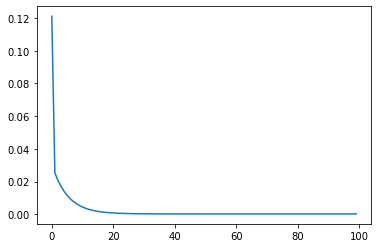

In [ ]:
plt.plot(array_of_losses)

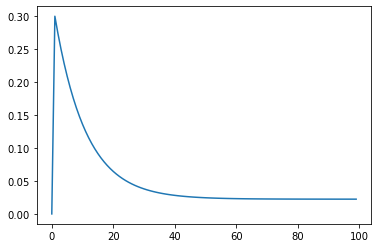

In [ ]:
plt.plot(array_of_bs)

## TRIAL 2

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(X, Y)
print(lr.intercept_)
print(lr.coef_)

In [ ]:
lr.fit(X, Y)
print(lr.intercept_)
print(lr.coef_)

[0.02235445]
[[0.96874813]]


In [ ]:
import statsmodels.api as sps

In [ ]:
sps.OLS(Y, X).fit().summary()

C:\Users\saksh\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              7815.
Date:                Thu, 23 Feb 2023   Prob (F-statistic):                    3.32e-25
Time:                        11:42:20   Log-Likelihood:                          44.233
No. Observations:                  19   AIC:                                     -86.47
Df Residuals:                      18   BIC:                                     -85.52
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0043      0.011     88.401      0.000       0.980       1.028
==============================================================================
Omnibus:                        4.695   Durbin-Watson:                   1.188
Prob(Omnibus):                  0.096   Jarque-Bera (JB):                1.946
Skew:                           0.437   Prob(JB):                        0.378
Kurtosis:                       1.699   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""